In [12]:
import pandas as pd
import numpy as np
# from matplotlib as plt
import seaborn as sns
# %matplotib inline

data1 = pd.read_csv('insta_tada_sm1.csv')

In [13]:
data1.describe()

,Unnamed: 0,sentiment
count,2817.000000,2817.000000
mean,1408.000000,0.771939
std,813.342179,0.308346
min,0.000000,0.001735
25%,704.000000,0.619364
50%,1408.000000,0.944874
75%,2112.000000,0.990299
max,2816.000000,0.998380


In [14]:
data1.head(10)

,Unnamed: 0,0,1900-01-01,2,3,4,sentiment
0,497,#브로쓰마카롱 롯백 팝업행사하길래 허겁지겁 갔는데 개실망스럽내 ㅡㅡ 서면은 쫀득하고...,2020-02-08,3,NaN,['#브로쓰마카롱'],0.001735
1,1237,아침부터 열나게 준비하고 버스타러 뛰다가 넘어지고...결국.. 무릎.정강이.손바닥....,2019-04-27,36,NaN,"['#브로쓰마카롱', '#동래점', '#오픈이벤트', '#마카롱', '#머랭쿠키',...",0.001770
2,1017,당다라당당 당떨어진드...😵마카롱 찡기네🤖,2019-06-24,85,"Busan, South Korea",[],0.001793
3,1593,6개사준다는거 내가돼지냐며 3개만 샀는데 그순간을 후회하는중이다...🌝그냥 돼지할걸,2019-01-28,145,Cafe 301,[],0.001828
4,408,카페모카롤카라멜크림브륄레로투스순수우유소량씩 남고 품절입니다6시 30분 #브로쓰마카롱,2020-03-13,31,NaN,['#브로쓰마카롱'],0.001846
5,112,'내 책으로 한권 읽기 ' 도서구입 신청한대서 그 핑계로 서점 서면 나가기...,2020-07-11,4,NaN,"['#서면규카츠', '#진짜더러운식당', '#고기20분뒤나옴', '#나중에온손님이랑...",0.001870
6,291,오늘은 브로쓰마카롱🤭정신병터진 나에게 남편의 극약처방🧠💊짜증이 왜이래 미친듯이 나는...,2020-05-03,50,NaN,[],0.001911
7,2576,주말 다 되서야 편도 다 붓고 컨디션 엉망이게 뭐하자는거...?😨,2018-07-05,136,NaN,[],0.001916
8,1814,점심시간에 주주 삥뜯기 😆#브로쓰마카롱,2018-12-20,21,NaN,['#브로쓰마카롱'],0.001951
9,2059,신제품 엄마는외계인B사의 아이스크림을 따라 만들어봤어요그냥 초코바닐라입니다 ㅋ초코칩...,2018-11-02,81,Cafe 301,"['#브로쓰마카롱', '#카페301', '#cafe301']",0.001970


In [15]:
df = data1.rename({'Unnamed: 0':'index', '0':'insta', '1900-01-01':'date', '2':'like', '3':'loca', '4':'has'}, axis='columns')
df

,index,insta,date,like,loca,has,sentiment
0,497,#브로쓰마카롱 롯백 팝업행사하길래 허겁지겁 갔는데 개실망스럽내 ㅡㅡ 서면은 쫀득하고...,2020-02-08,3,NaN,['#브로쓰마카롱'],0.001735
1,1237,아침부터 열나게 준비하고 버스타러 뛰다가 넘어지고...결국.. 무릎.정강이.손바닥....,2019-04-27,36,NaN,"['#브로쓰마카롱', '#동래점', '#오픈이벤트', '#마카롱', '#머랭쿠키',...",0.001770
2,1017,당다라당당 당떨어진드...😵마카롱 찡기네🤖,2019-06-24,85,"Busan, South Korea",[],0.001793
3,1593,6개사준다는거 내가돼지냐며 3개만 샀는데 그순간을 후회하는중이다...🌝그냥 돼지할걸,2019-01-28,145,Cafe 301,[],0.001828
4,408,카페모카롤카라멜크림브륄레로투스순수우유소량씩 남고 품절입니다6시 30분 #브로쓰마카롱,2020-03-13,31,NaN,['#브로쓰마카롱'],0.001846
...,...,...,...,...,...,...,...
2812,1227,우리 동네에 생긴 마카롱집✨#브로쓰마카롱 #존맛탱 #냠냠,2019-04-28,14,NaN,"['#브로쓰마카롱', '#존맛탱', '#냠냠']",0.998351
2813,1147,존맛탱구리구리,2019-05-17,50,NaN,[],0.998352
2814,415,..자꾸 생각나는 마카롱~..살찐자각..#내사랑마카롱#브로쓰마카롱#존맛!!,2020-03-12,26,NaN,"['#내사랑마카롱', '#브로쓰마카롱', '#존맛!!']",0.998368
2815,2502,여기 마카롱 최고👍,2018-07-28,30,NaN,[],0.998374


In [16]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

index                 int64
insta                object
date         datetime64[ns]
like                 object
loca                 object
has                  object
sentiment           float64
dtype: object

In [17]:
df['sentiment']

0       0.001735
1       0.001770
2       0.001793
3       0.001828
4       0.001846
          ...   
2812    0.998351
2813    0.998352
2814    0.998368
2815    0.998374
2816    0.998380
Name: sentiment, Length: 2817, dtype: float64

In [18]:
df.sort_values(['date'], ascending=True)

,index,insta,date,like,loca,has,sentiment
598,2816,부산 브로쓰마카롱 패키지 작업~!음표머리 철수느끰!!😙😙4월 오픈예정이랍니닷!! #...,2018-03-22,493,서면&전포 카페거리,"['#서면카페', '#서면마카롱', '#브로쓰마카롱', '#전포카페거리', '#부산...",0.523709
1732,2815,브로쓰마카롱 패키지 캐릭터작업어맛 넘이쁘닷!!😳😳. .#서면카페 #서면마카롱 #브로...,2018-03-23,495,NaN,"['#서면카페', '#서면마카롱', '#브로쓰마카롱', '#전포카페거리', '#부산...",0.973462
1737,2814,#부산#서면#로꼬스바또스#마약스파게티#브로쓰마카롱#머랭쿠키#페이퍼투콘크리트#비엔나커...,2018-04-23,63,NaN,"['#부산', '#서면', '#로꼬스바또스', '#마약스파게티', '#브로쓰마카롱'...",0.973645
2654,2813,오늘은 츌근길에 서면시장에서마카롱!!!!!! 아직은 가오픈인가바..ㅎ하나 먹었는데 ...,2018-04-24,132,헐리우드스타 서면,['#브로쓰마카롱'],0.997813
1061,2812,❣소형스투키스탠드❣--#블라워_식물--#스투키 #스탠드화분 #브로쓰마카롱 #개업선물...,2018-04-24,13,"Busan, South Korea","['#블라워_식물--', '#스투키', '#스탠드화분', '#브로쓰마카롱', '#개...",0.863142
...,...,...,...,...,...,...,...
664,13,롯데백화점 광복점 단기입점으로 인해3개월 단기 판매사원을 구인중입니다3개월후 계약이...,2020-08-21,52,NaN,['#브로쓰마카롱'],0.585934
951,12,#브로쓰마카롱#마카롱#디저트#초콜릿#돼지바#먹스타그램#맛스타그램#macaron#ma...,2020-08-22,11,NaN,"['#브로쓰마카롱', '#마카롱', '#디저트', '#초콜릿', '#돼지바', '#...",0.812153
878,11,광복팝업으로 인해301은 평일만 운영합니다 #브로쓰마카롱,2020-08-22,23,NaN,['#브로쓰마카롱'],0.768357
416,10,#20200822 #수히식단-#수히아침 (09:43)•#요그앤오트 #그릭요거트 75...,2020-08-22,57,NaN,"['#20200822', '#수히식단-', '#수히아침', '#요그앤오트', '#그...",0.363160


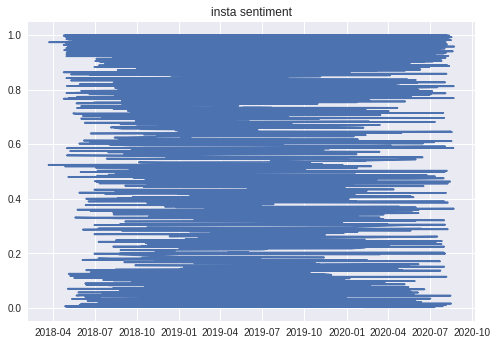

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# df['pn'] = 0
# for i in range(len(df['sentiment'])):
#   if df['sentiment'][i] > 0.5:
#     df['pn'] = 1
#   else:
#     df['pn'] = 0
# df

plt.style.use('seaborn')
plt.title("insta sentiment")
plt.plot(df['date'], df['sentiment'])
plt.show()

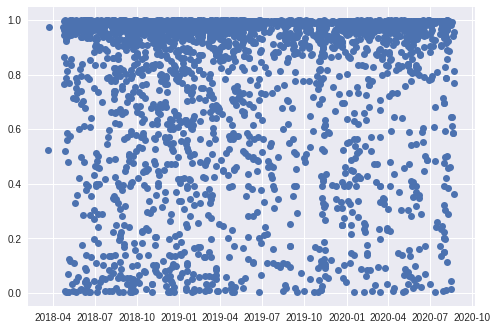

In [20]:
plt.plot(df['date'], df['sentiment'], 'o')

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


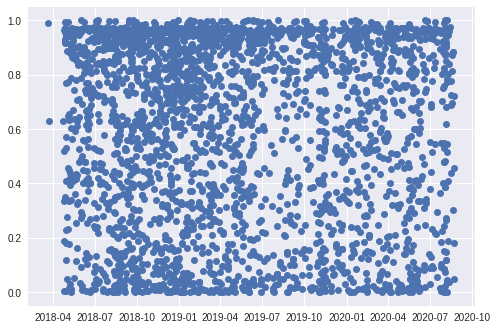

In [21]:
j=[1,2]
for i in range(len(j)):   
    positive = df['sentiment']
    negative = 1 - df['sentiment']

    test = ((positive - negative)/(positive + negative))*(positive-negative)
    for i in range(len(df['sentiment'])):
      if df['sentiment'][i] > 0.5:
        df['pn'] = 1
      else:
        df['pn'] = 0

    for i in range(len(df['sentiment'])):
        df['sentiment'][i] = test[i]

plt.plot(df['date'], df['sentiment'], 'o')

plt.show()

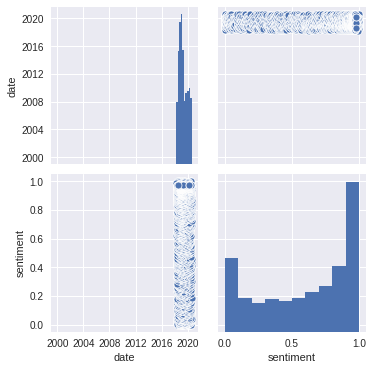

In [22]:
sns.pairplot(df, vars=['date', 'sentiment'])
plt.show()

In [23]:
from imblearn.over_sampling import SMOTE

from pandas import Series, DataFrame

def a(x):
  if x>0.5:
    return 1
  else:
    return 0

df['np'] = df['sentiment'].apply(a)
x = df['sentiment']
y = df['np']

x = np.array(x)
x.reshape(-1,1)
x = pd.DataFrame(x)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
x.shape, y.shape

((2817, 1), (2817,))

SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (3526, 1) (3526,)
SMOTE 적용 후 레이블 값 분포: 
 1    1763
0    1763
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


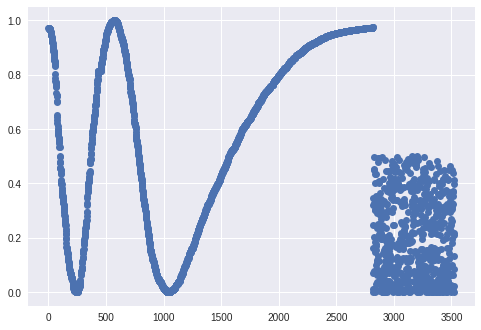

In [25]:
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=4) #ratio = 1.0
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)
x_SMOTE, y_SMOTE = sm.fit_sample(x, y) 

# print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', df[], data_pos)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_SMOTE.shape, y_SMOTE.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_SMOTE).value_counts())

plt.plot(x_SMOTE, 'o')